In [1]:
import pandas as pd
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Load the CSV file into a pandas DataFrame
covid = pd.read_csv('../Reddit_Sentiments/covid19_sentiments.csv')
covid = covid[covid['sentiment_polarity_summary']=='negative']
covid.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 186 entries, 3 to 884
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0.1                186 non-null    int64  
 1   Unnamed: 0                  186 non-null    int64  
 2   id                          186 non-null    object 
 3   author                      186 non-null    object 
 4   title                       186 non-null    object 
 5   score                       186 non-null    int64  
 6   comms_num                   186 non-null    int64  
 7   created                     186 non-null    float64
 8   timestamp                   186 non-null    object 
 9   commenter                   161 non-null    object 
 10  comment                     186 non-null    object 
 11  top_lvl                     186 non-null    int64  
 12  sentiment_polarity          186 non-null    float64
 13  cluster                     186 non

In [6]:
#get unique id
ids = list(covid['id'].unique())
len(ids)

19

<h1>covid19</h1>

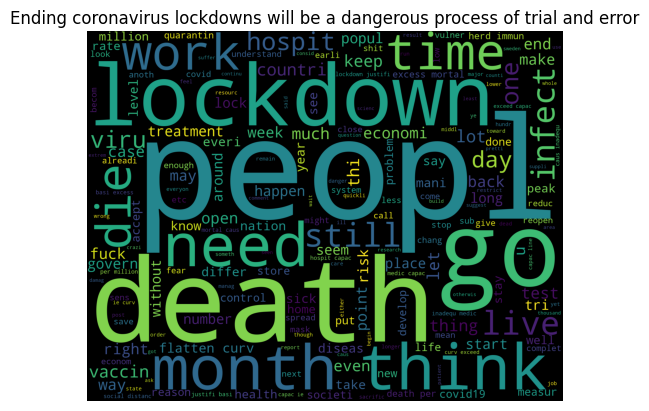

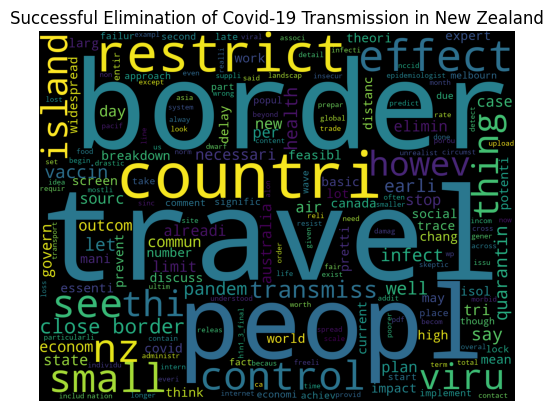

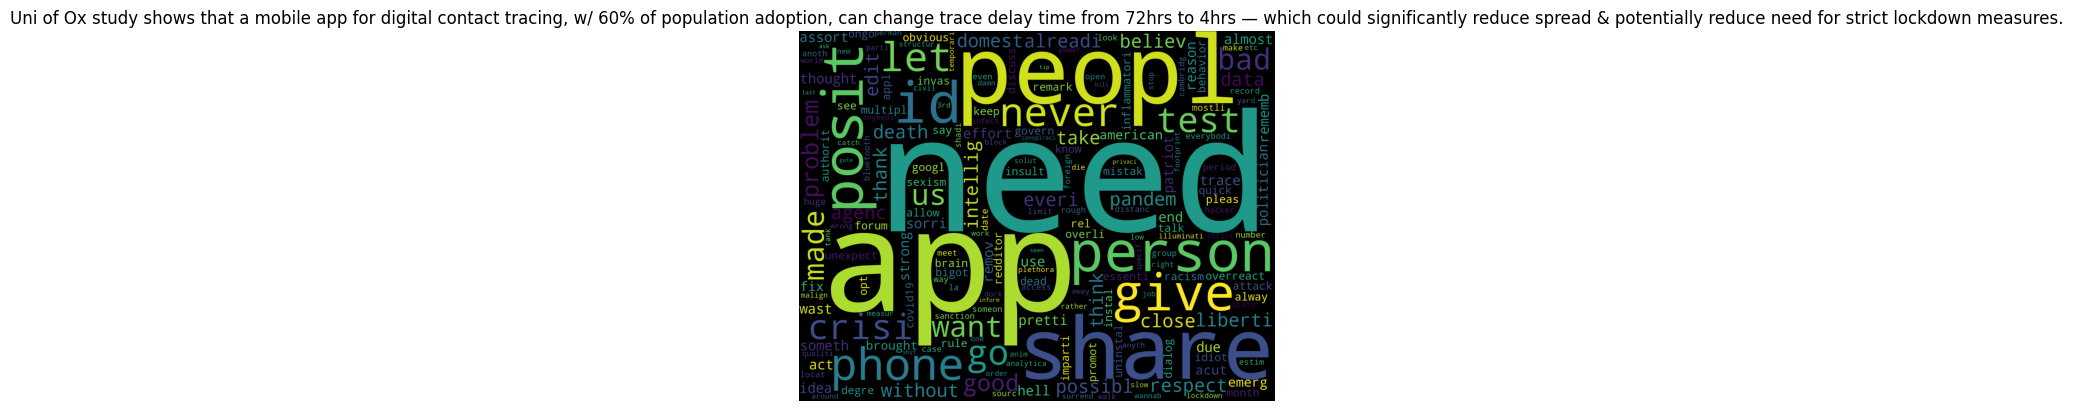

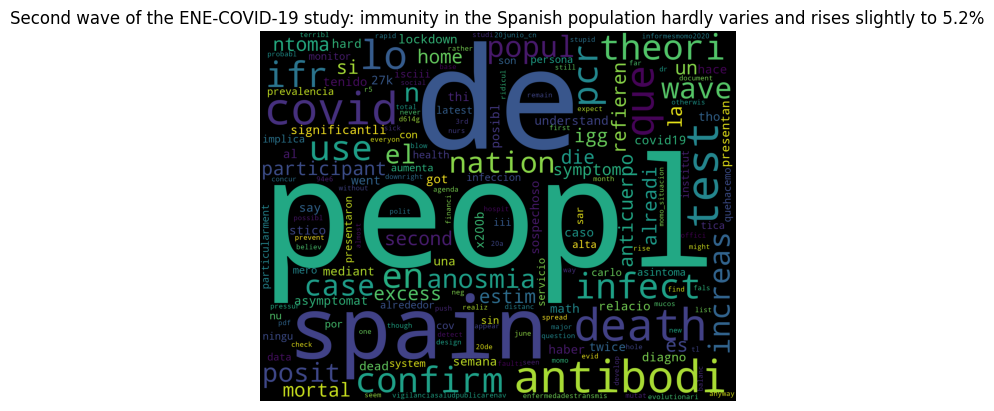

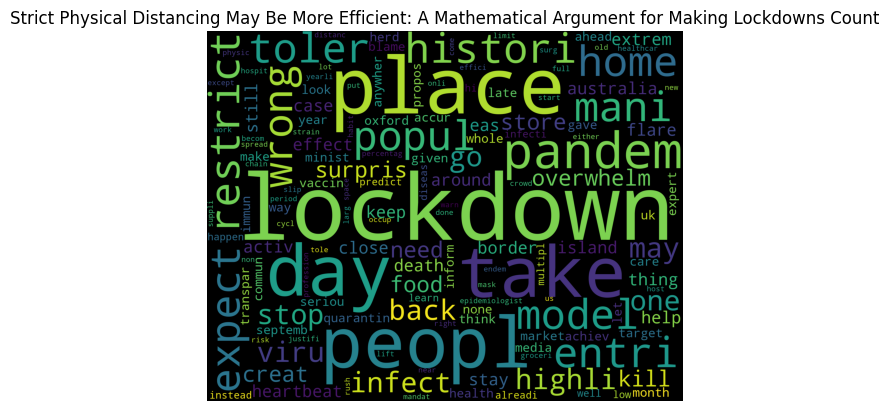

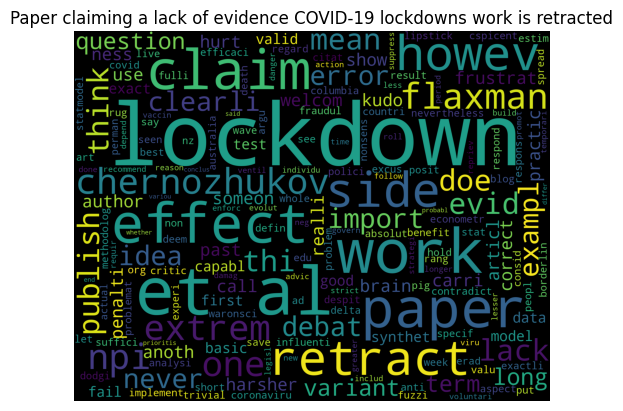

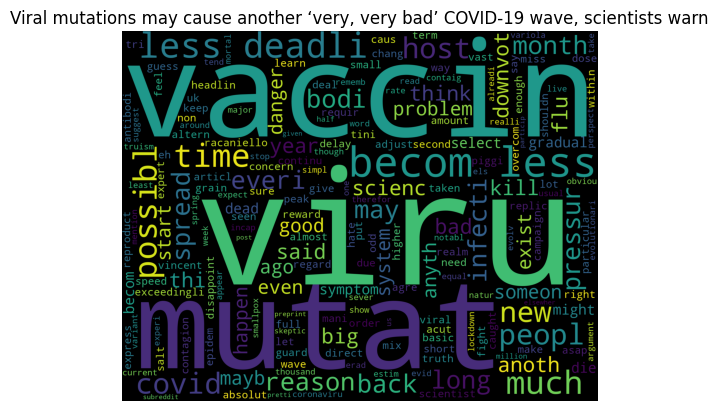

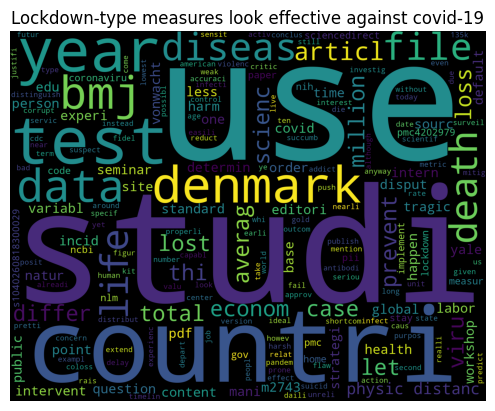

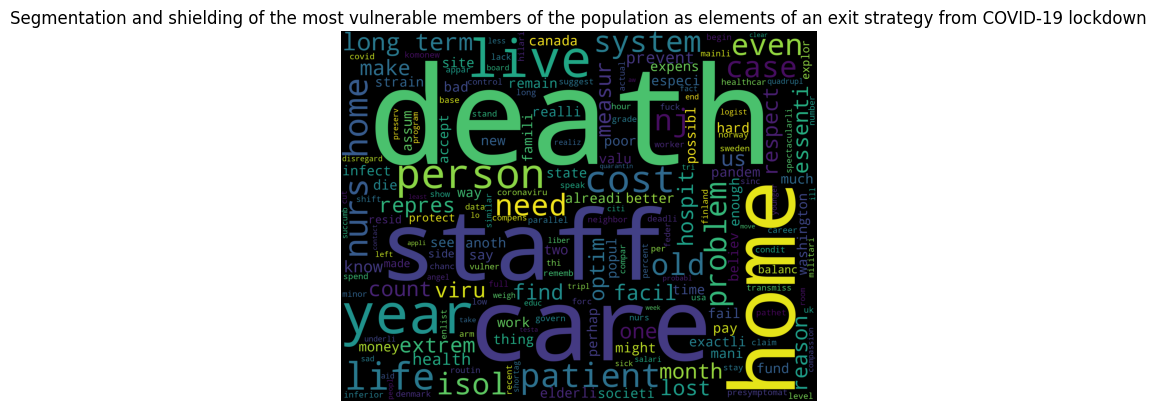

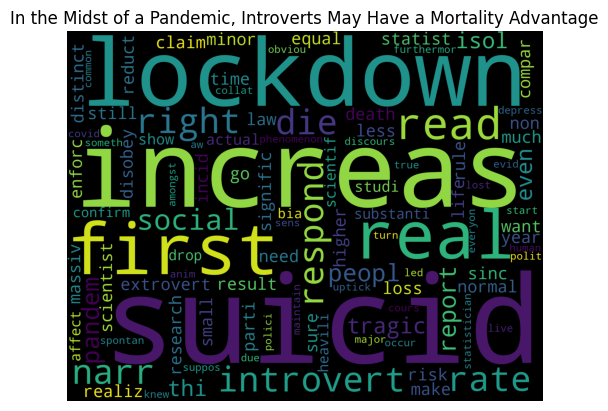

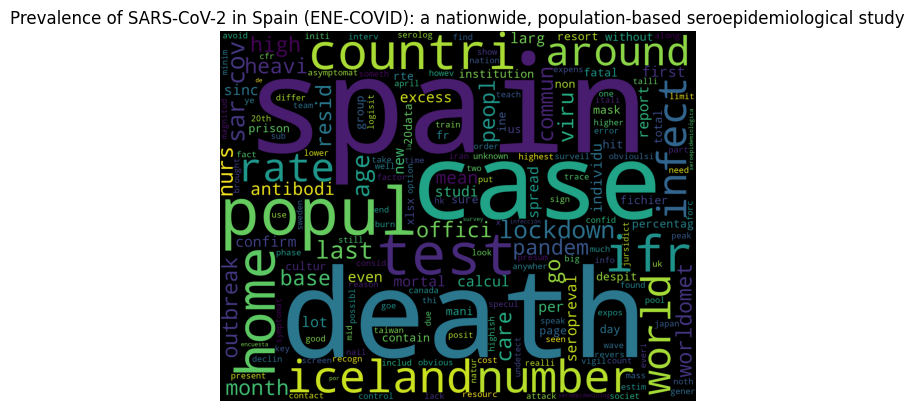

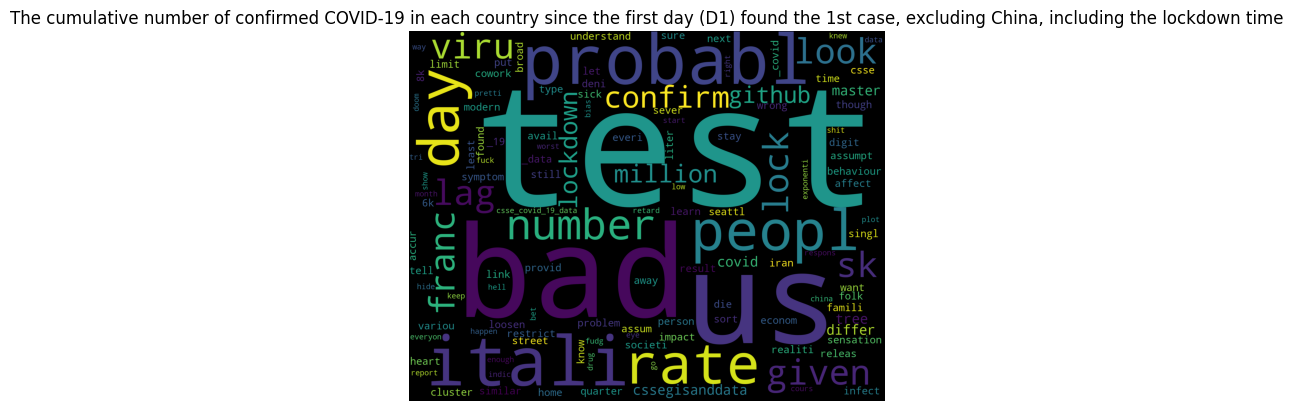

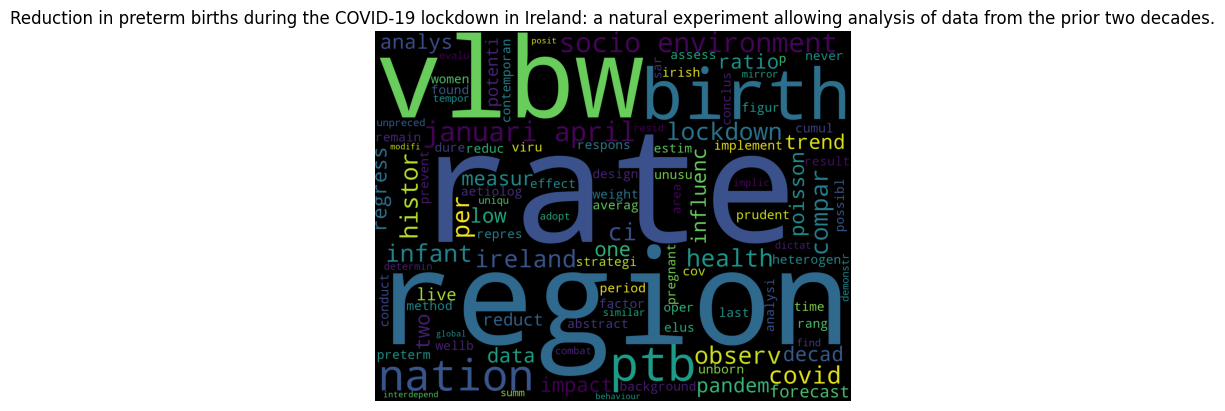

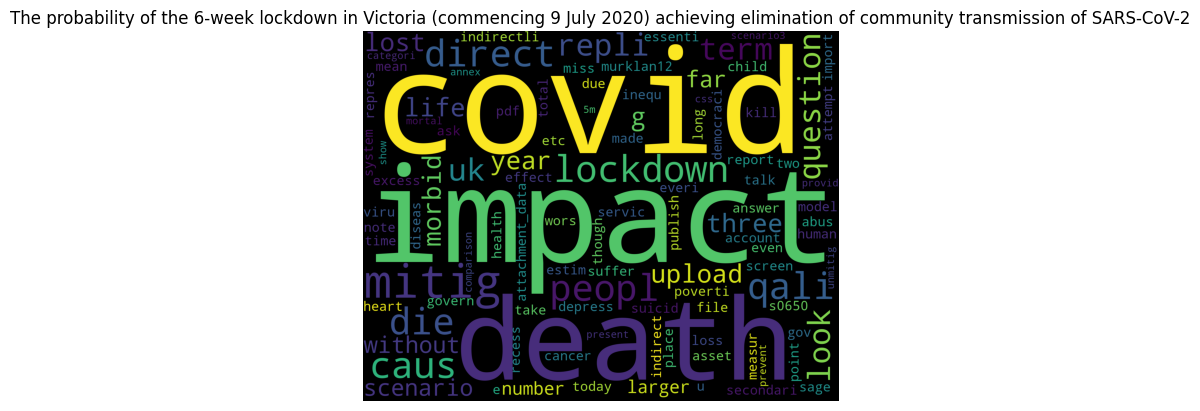

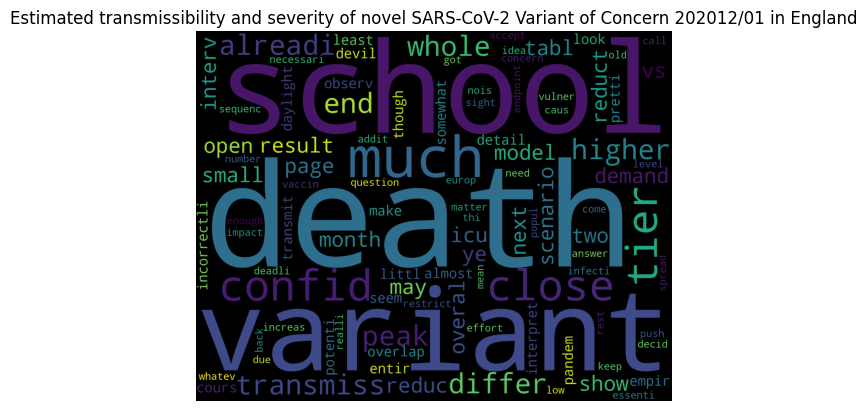

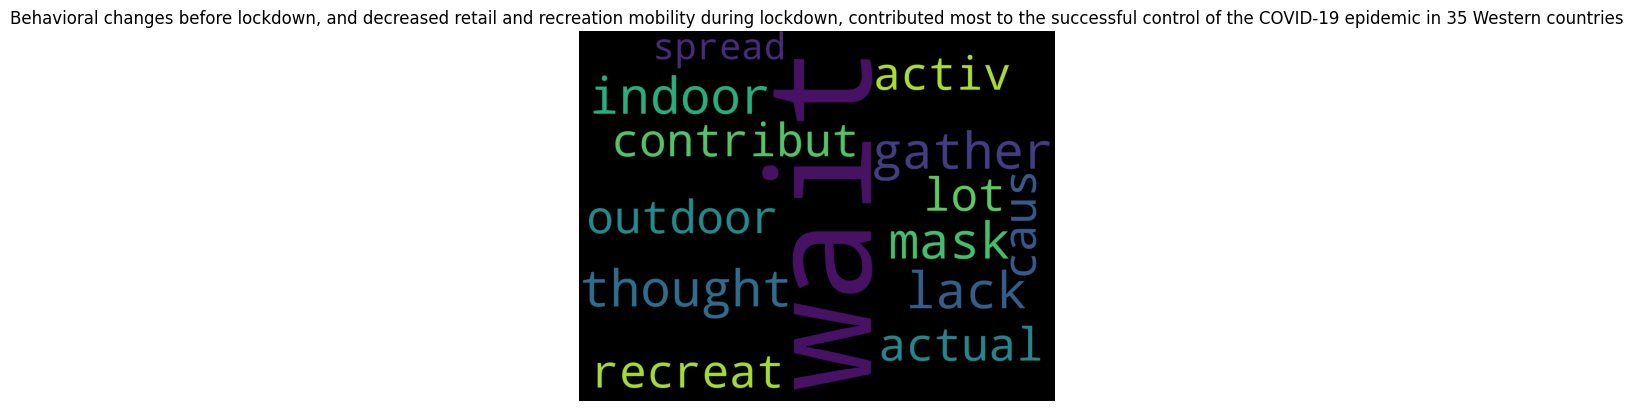

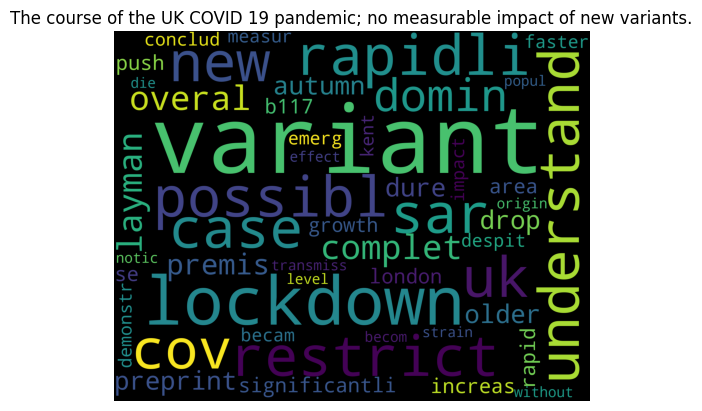

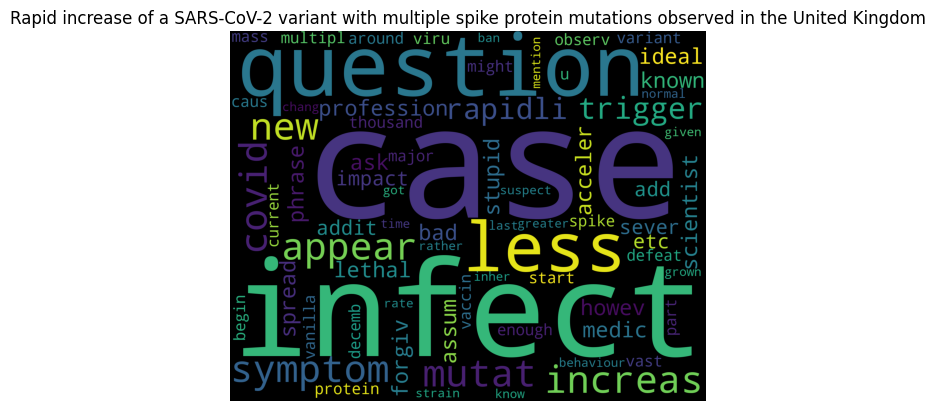

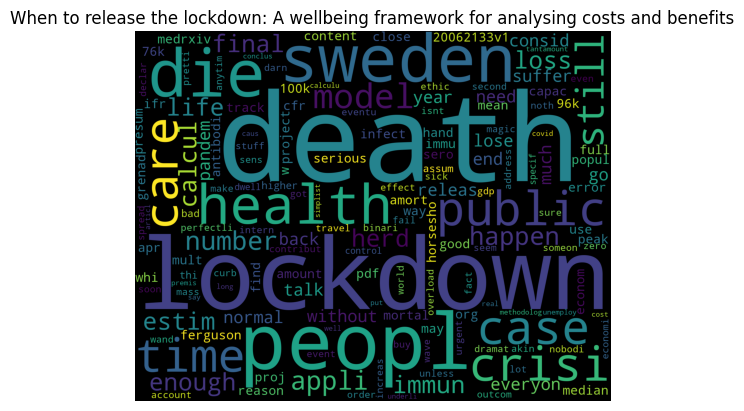

In [4]:
for id in ids:
    comments_list = list(covid['comment'][covid.id==id])
    comments = " ".join([str(x) for x in comments_list])
    word_cloud = WordCloud(background_color='black',
                       width=1800,
                       height=1400).generate(comments)
    plt.imshow(word_cloud)
    plt.axis('off')
    plt.title(str(covid['title'].loc[covid['id']==id].iloc[0]))
    plt.show()
    